In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import torchaudio
from pathlib import Path
from tqdm.auto import tqdm

In [2]:
# first train - 1109 files
# second train - 1740 files
# third train - 1861 files
# test - 1017 files
train_df = pd.read_csv('../data/raw/Train.csv')
FIRST_PATH = Path('../data/raw/')
SECOND_PATH = Path('../data/raw/latest_keywords')
THIRD_PATH = Path('../data/raw/nlp_keywords')

In [12]:
all_train = pd.read_csv('../data/raw/all_train.csv')

In [13]:
all_train.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [29]:
all_train

,fn,label,utt_id
0,audio_files/IV38R7F.wav,akawuka,IV38R7F
1,audio_files/KM4SKWT.wav,banana,KM4SKWT
2,audio_files/F5POSU9.wav,obulwadde,F5POSU9
3,audio_files/MMVDXG2.wav,nnyaanya,MMVDXG2
4,audio_files/9TVM96F.wav,pampu,9TVM96F
...,...,...,...
4704,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe,d027264654b94950aeb204f64d05d8d7
4705,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe,d027264654b94950aeb204f64d05d8d7
4706,nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e...,emiyembe,6fbfcce2cf21419e97290f9e12934f65
4707,nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e...,emiyembe,6fbfcce2cf21419e97290f9e12934f65


In [30]:
all_train.to_csv('../data/raw/all_train.csv', index=False, header=True)

In [15]:
all_train['fname'] = all_train['fn'].apply(lambda x: x.split('/')[-1])

In [18]:
all_train['utt_id'] = all_train['fname'].apply(lambda x: x.split('_')[0] if '_' in x else x.split('.')[0])

In [42]:
all_train.groupby('label')['utt_id'].nunique().sort_values()

label
worm                  3
ground nuts           3
irish potatoes        3
maize stalk borer     3
mango                 3
                     ..
ndwadde              17
akasaanyi            18
ebigimusa            18
munyeera             18
ensiringanyi         18
Name: utt_id, Length: 193, dtype: int64

In [47]:
all_train[all_train['label'] == 'ndwadde'].sort_values('utt_id')

,fn,label,utt_id
1115,latest_keywords/ndwadde/0a8fccdb95b749dca0404b...,ndwadde,0a8fccdb95b749dca0404bf433872764
1111,latest_keywords/ndwadde/0a8fccdb95b749dca0404b...,ndwadde,0a8fccdb95b749dca0404bf433872764
1125,latest_keywords/ndwadde/2497942026ef4d7e97d47f...,ndwadde,2497942026ef4d7e97d47fc2738d7c27
245,audio_files/2U4X3DX.wav,ndwadde,2U4X3DX
777,audio_files/3Z62H20.wav,ndwadde,3Z62H20
1128,latest_keywords/ndwadde/3d43af6faf2244c288154d...,ndwadde,3d43af6faf2244c288154dc4ff6a734f
1124,latest_keywords/ndwadde/3d43af6faf2244c288154d...,ndwadde,3d43af6faf2244c288154dc4ff6a734f
1122,latest_keywords/ndwadde/3d43af6faf2244c288154d...,ndwadde,3d43af6faf2244c288154dc4ff6a734f
1119,latest_keywords/ndwadde/3d43af6faf2244c288154d...,ndwadde,3d43af6faf2244c288154dc4ff6a734f
1112,latest_keywords/ndwadde/3d43af6faf2244c288154d...,ndwadde,3d43af6faf2244c288154dc4ff6a734f


In [50]:
utt_counts = all_train['utt_id'].value_counts()
unique_utts = utt_counts[utt_counts == 1].index.values

In [61]:
unique_utt_samples = all_train[all_train['utt_id'].isin(unique_utts)]
nonunique_utt_samples = all_train[~all_train['utt_id'].isin(unique_utts)]

In [64]:
nonunique_utt_samples['utt_id'].value_counts(normalize=True)

d027264654b94950aeb204f64d05d8d7    0.297500
6fbfcce2cf21419e97290f9e12934f65    0.215556
2497942026ef4d7e97d47fc2738d7c27    0.093056
771b5044334242fb9caff8a71fd7891e    0.072500
1b5a69c4b88b41eb9577a656e11bb7dd    0.068333
744b1a437234489fae9512694d2212ae    0.044722
d45cd9903b3044d494866b3162651a76    0.039167
3d43af6faf2244c288154dc4ff6a734f    0.038889
5aa4893526794a73a3ed0a7ebba2a7bf    0.027778
eb702740d41f4f389192ec5c6a3ae95f    0.027778
0a8fccdb95b749dca0404bf433872764    0.020278
655ab13e2b784ceabf71f38c1e9d5976    0.015000
79aac18aacc74cc092d00778f7f323da    0.014444
62a43378312341918722fbe81a34ffd7    0.013611
9181ed273f5b460ba7dd7a5b2d7f0612    0.009722
eaea87cf8db24035bde28e73a536e278    0.001111
630517ca2f8642cdae94a181a728f566    0.000556
Name: utt_id, dtype: float64

In [ ]:
val_utts = [
    '6fbfcce2cf21419e97290f9e12934f65',
    '771b5044334242fb9caff8a71fd7891e',
    '744b1a437234489fae9512694d2212ae',
    '3d43af6faf2244c288154dc4ff6a734f',
    'eb702740d41f4f389192ec5c6a3ae95f',
    '655ab13e2b784ceabf71f38c1e9d5976',
    '62a43378312341918722fbe81a34ffd7',
    'eaea87cf8db24035bde28e73a536e278',
]

In [67]:
train_utts = [
    'd027264654b94950aeb204f64d05d8d7',
    '2497942026ef4d7e97d47fc2738d7c27',
    '1b5a69c4b88b41eb9577a656e11bb7dd',
    'd45cd9903b3044d494866b3162651a76',
    '5aa4893526794a73a3ed0a7ebba2a7bf',
    '0a8fccdb95b749dca0404bf433872764',
    '79aac18aacc74cc092d00778f7f323da',
    '9181ed273f5b460ba7dd7a5b2d7f0612',
    '630517ca2f8642cdae94a181a728f566'
]

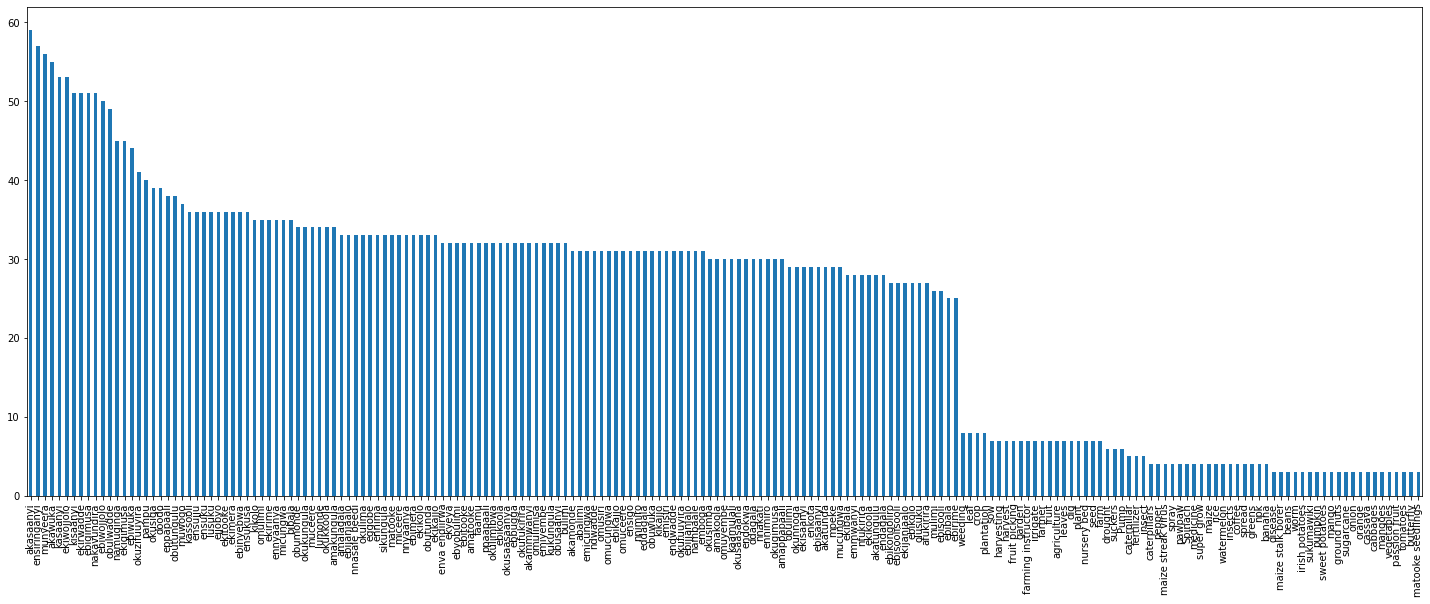

In [65]:
fig, ax = plt.subplots(figsize=(25, 9))
all_train['label'].value_counts().plot(kind='bar', ax=ax);

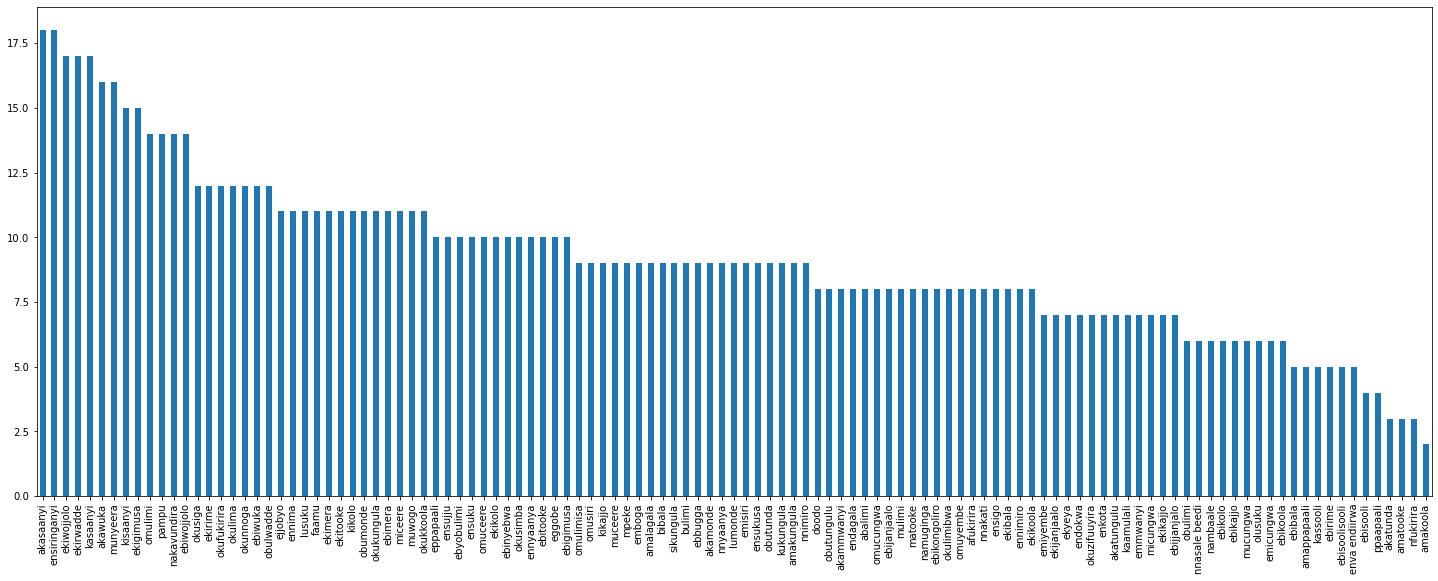

In [66]:
fig, ax = plt.subplots(figsize=(25, 9))
all_train[all_train['utt_id'] == 'd027264654b94950aeb204f64d05d8d7']['label'].value_counts().plot(kind='bar', ax=ax);

In [31]:
sub_df = pd.read_csv('../data/raw/SampleSubmission.csv')

In [35]:
sub_df.columns[1:].values

array(['maize streak virus', 'disease', 'okukkoola', 'muwogo', 'mpeke',
       'mucungwa', 'greens', 'garden', 'mango', 'bulimi', 'obuwuka',
       'ebikoola', 'obulimi', 'ebisoolisooli', 'kaamulali', 'eddagala',
       'beans', 'omuyembe', 'leaf', 'kisaanyi', 'leaves', 'butterfly',
       'okuzifuuyira', 'micungwa', 'ppaapaali', 'emboga', 'kikolo',
       'harvest', 'olusuku', 'coffee', 'super grow', 'rice', 'ensujju',
       'okulima', 'worm', 'ebbugga', 'onion', 'ensigo', 'plantation',
       'ensukusa', 'maize stalk borer', 'amakoola', 'muceere', 'insect',
       'pumpkin', 'spray', 'namuginga', 'tomatoes', 'akatungulu',
       'ground nuts', 'orange', 'nursery bed', 'npk', 'mangoes',
       'ebitooke', 'maize', 'endwadde', 'lumonde', 'ensiringanyi',
       'pawpaw', 'ebijjanjalo', 'sukumawiki', 'caterpillars',
       'matooke seedlings', 'okusaasaana', 'omuceere', 'ebikajjo',
       'mulimi', 'sikungula', 'watermelon', 'ennima', 'akammwanyi',
       'amakungula', 'ebyobulimi', 'ok

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(sub_df.columns[1:].values)

LabelEncoder()

In [39]:
le.transform(all_train['label'])

array([ 10,  16, 141, ...,  70,  70,  70])

array(['abalimi'], dtype=object)

In [28]:
all_train = all_train.drop('fname', axis=1)

In [5]:
# 5727 files
lengths = []
sample_rates = []

for item in tqdm(train_df['fn'].values):
    sample, rate = librosa.load(FIRST_PATH / item)
    sample_rates.append(rate)
    lengths.append(len(sample))

for item in tqdm(SECOND_PATH.rglob('*.wav')):
    sample, rate = librosa.load(item)
    sample_rates.append(rate)
    lengths.append(len(sample))

for item in tqdm(THIRD_PATH.rglob('*.wav')):
    sample, rate = librosa.load(item)
    sample_rates.append(rate)
    lengths.append(len(sample))

In [5]:
# check files
data_path = Path('../data/raw')
for path in tqdm(all_train['fn'].values, desc='Files'):
    _, _ = librosa.load(data_path / path)

KeyboardInterrupt: 

In [6]:
np.unique(lengths), np.unique(sample_rates)

(array([ 7938, 18522, 22491, 23814, 29106, 43659, 44982, 47628, 48951,
        51597, 52920, 54243, 54749, 55005, 55069, 55133, 55181, 55197,
        55239, 55261, 55298, 55325, 55389, 55416, 55453, 55475, 55517,
        55566, 55581, 58212, 60858]),
 array([22050]))

In [8]:
second_labels = []
for item in (SECOND_PATH.rglob('*.wav')):
    second_labels.append(item.parent.name)

third_labels = []
for item in (THIRD_PATH.rglob('*.wav')):
    third_labels.append(item.parent.name)

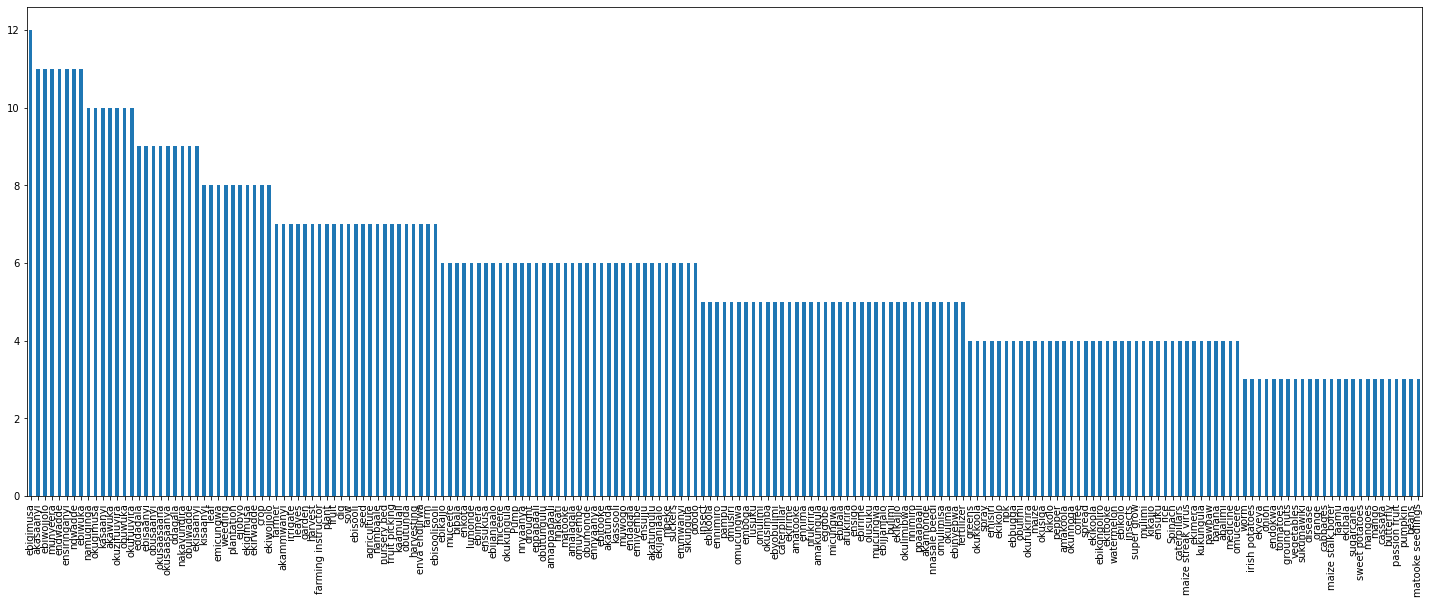

In [12]:
fig, ax = plt.subplots(figsize=(25, 9))
train_df['label'].value_counts().plot(kind='bar', ax=ax);

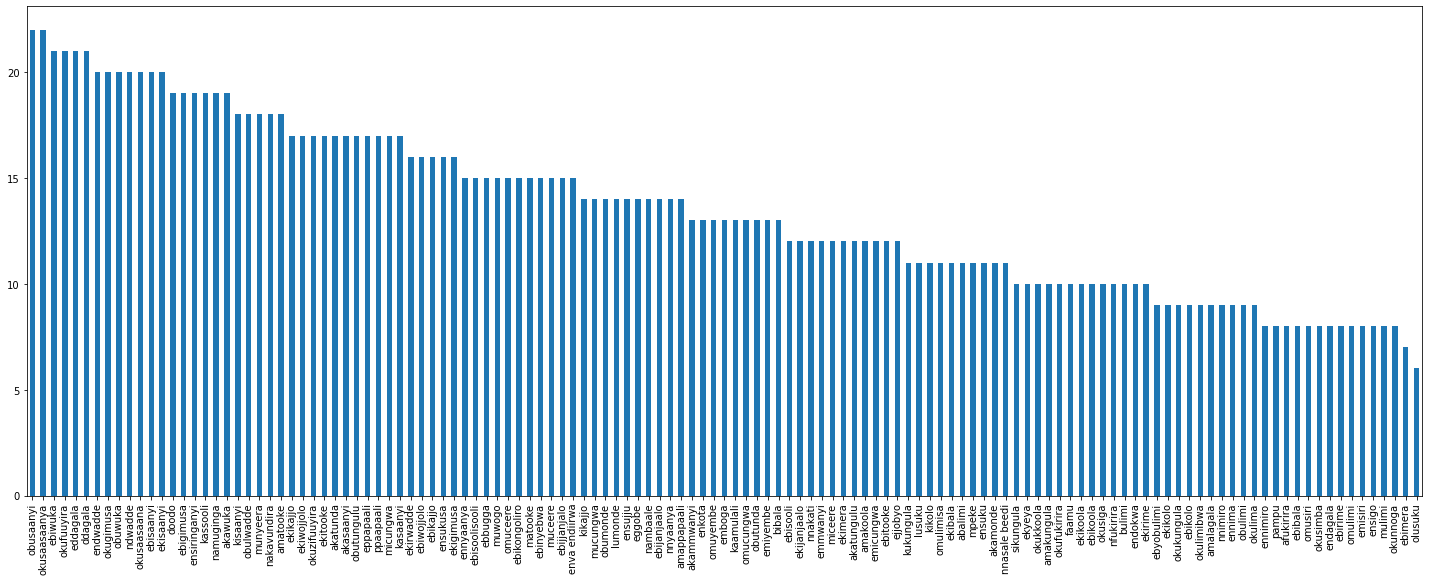

In [9]:
fig, ax = plt.subplots(figsize=(25, 9))
pd.Series(second_labels).value_counts().plot(kind='bar', ax=ax);

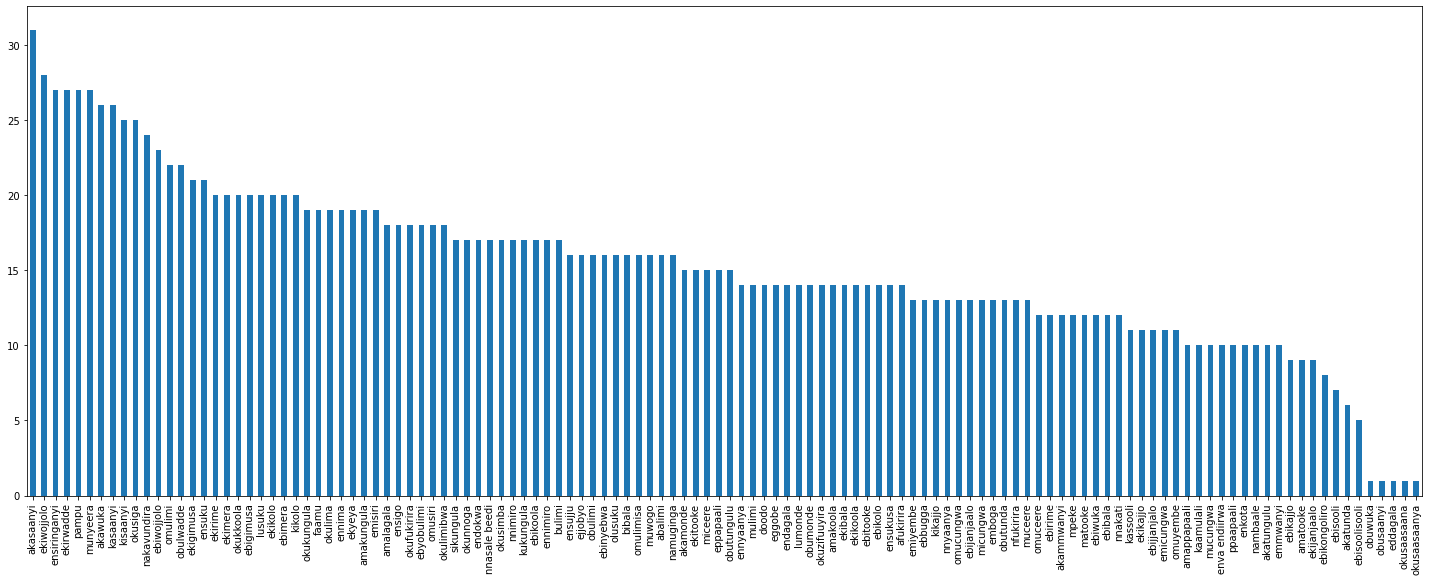

In [10]:
fig, ax = plt.subplots(figsize=(25, 9))
pd.Series(third_labels).value_counts().plot(kind='bar', ax=ax);

In [7]:
pd.Series(lengths).value_counts()

54243    3767
55261     221
55325     187
55197     109
55181      89
55389      80
55416      72
55453      51
55566      39
55133      31
55239      12
55069      12
55517      11
55298       5
55005       3
52920       2
55475       2
55581       2
43659       2
44982       1
22491       1
47628       1
7938        1
23814       1
18522       1
54749       1
48951       1
58212       1
29106       1
51597       1
60858       1
dtype: int64

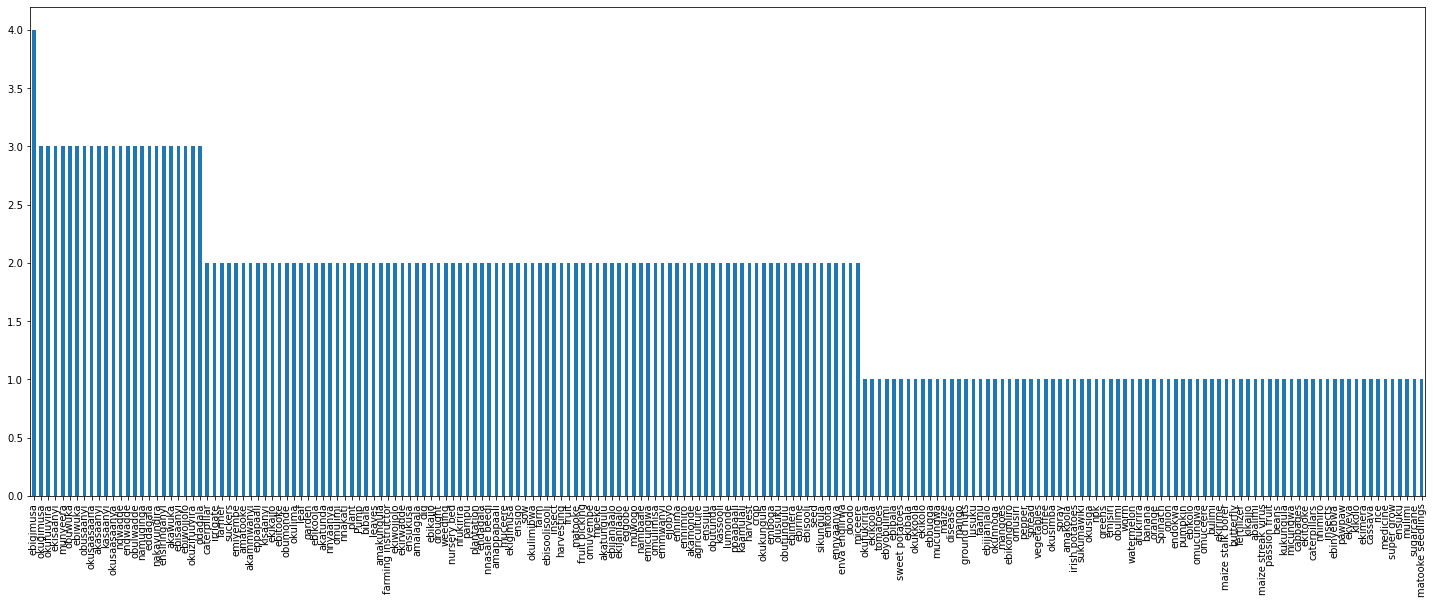

In [23]:
fig, ax = plt.subplots(figsize=(25, 9))
val['label'].value_counts().plot(kind='bar', ax=ax);

In [11]:
all_labels = []
all_labels.extend(list(train_df['label'].values))
all_labels.extend(second_labels)
all_labels.extend(third_labels)

In [12]:
len(all_labels)

4709

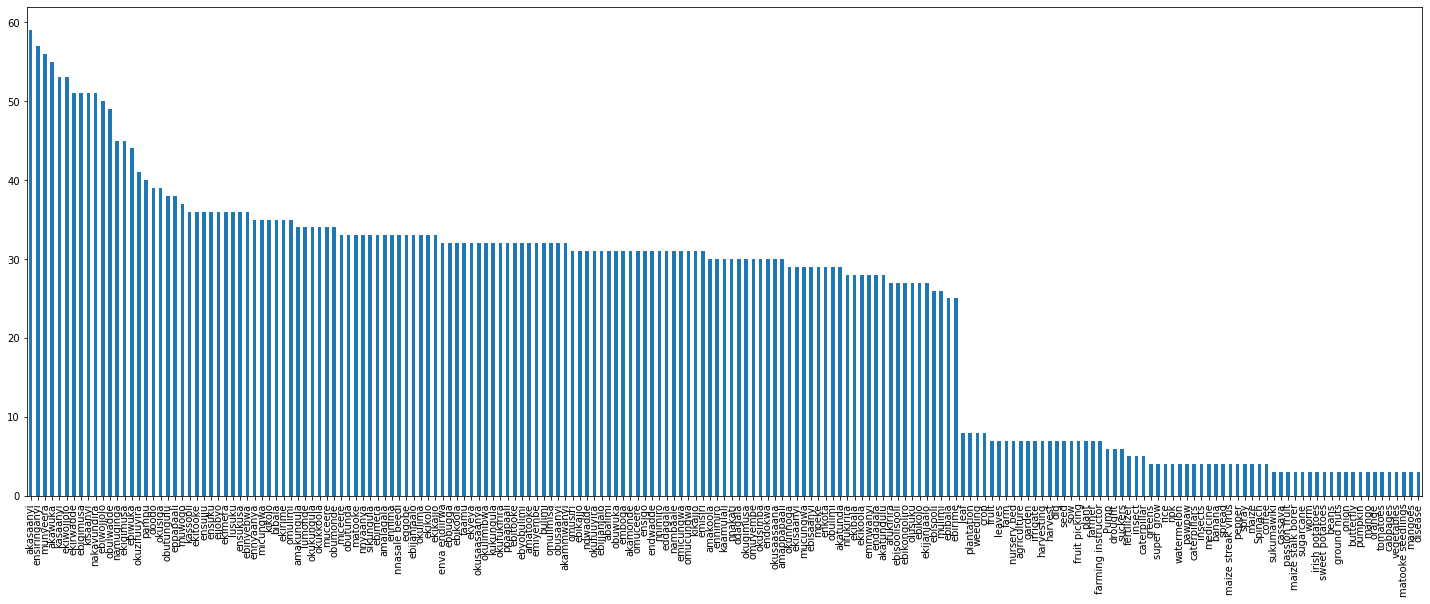

In [13]:
fig, ax = plt.subplots(figsize=(25, 9))
pd.Series(all_labels).value_counts().plot(kind='bar', ax=ax);

In [15]:
united_train = {
    'fn': list(train_df['fn'].values),
    'label': list(train_df['label'].values),
}

for item in SECOND_PATH.rglob('*.wav'):
    united_train['label'].append(item.parent.name)
    f_path = f'{item.parent.parent.name}/{item.parent.name}/{item.name}'
    united_train['fn'].append(f_path)

for item in THIRD_PATH.rglob('*.wav'):
    united_train['label'].append(item.parent.name)
    f_path = f'{item.parent.parent.name}/{item.parent.name}/{item.name}'
    united_train['fn'].append(f_path)

In [16]:
united_train = pd.DataFrame(united_train)
united_train.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [17]:
len(united_train)

4709

In [18]:
united_train.tail()

,fn,label
4704,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe
4705,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe
4706,nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e...,emiyembe
4707,nlp_keywords/emiyembe/6fbfcce2cf21419e97290f9e...,emiyembe
4708,nlp_keywords/emiyembe/d027264654b94950aeb204f6...,emiyembe


In [19]:
test_df = pd.read_csv(FIRST_PATH / 'SampleSubmission.csv')
len(test_df)

1017

In [20]:
united_train.to_csv(FIRST_PATH / 'all_train.csv', index=False, header=True)

In [2]:
train = pd.read_csv('../data/raw/Train.csv')

In [3]:
train.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [4]:
train['fnn'] = train['fn'].apply(lambda x: x.split('/')[-1])

In [5]:
train.head()

,fn,label,fnn
0,audio_files/IV38R7F.wav,akawuka,IV38R7F.wav
1,audio_files/KM4SKWT.wav,banana,KM4SKWT.wav
2,audio_files/F5POSU9.wav,obulwadde,F5POSU9.wav
3,audio_files/MMVDXG2.wav,nnyaanya,MMVDXG2.wav
4,audio_files/9TVM96F.wav,pampu,9TVM96F.wav


In [11]:
train.sort_values('label').head(50)

,fn,label,fnn
1021,audio_files/ZF9M5SR.wav,Pump,ZF9M5SR.wav
496,audio_files/35E5C28.wav,Pump,35E5C28.wav
500,audio_files/RSWJ1ZK.wav,Pump,RSWJ1ZK.wav
575,audio_files/YMCUEQG.wav,Pump,YMCUEQG.wav
606,audio_files/W9WJILR.wav,Pump,W9WJILR.wav
623,audio_files/9ZK85SR.wav,Pump,9ZK85SR.wav
906,audio_files/CRNVLST.wav,Spinach,CRNVLST.wav
98,audio_files/TGZC27X.wav,Spinach,TGZC27X.wav
495,audio_files/X6CZ07E.wav,Spinach,X6CZ07E.wav
641,audio_files/HFBSDE6.wav,Spinach,HFBSDE6.wav
